# Step 2 : using models to extract data

##

## test on one row

In [1]:
import pandas as pd 
from utils.qwen import infer, getTokenCount , extract_article_metadata
import tqdm
tqdm.tqdm.pandas()
import json
import re

## starting with getting token counts

In [2]:
data = pd.read_csv("1-step1.csv")

In [3]:
getTokenCount(data.loc[0, "page1"])

535

In [4]:
getTokenCount(data.loc[0, "page2"])

782

In [5]:
getTokenCount(data.loc[0, "page3"])

445

### Lets get the average token count to adjust the model parameters

In [6]:
data[[f"{page}_token_count" for page in ["page1", "page2", "page3"]] ] = data[["page1", "page2", "page3"]].progress_apply(lambda x: [getTokenCount(x["page1"]), getTokenCount(x["page2"]), getTokenCount(x["page3"])], axis=1, result_type='expand')

100%|██████████| 1635/1635 [00:57<00:00, 28.68it/s]


In [7]:
data.head(2)

,article_id,title,title_en,abstract_ar,abstract_en,general_field,field,authors,authors_en,publish_date,source,page1,page2,page3,page1_token_count,page2_token_count,page3_token_count
0,1,درجة اكتساب طلبة كلية التربية بجامعة السلطان ق...,The Level of Acquisition of Action Research Sk...,NaN,NaN,NaN,NaN,"[""نور النجار""]",NaN,NaN,AJP,Association of Ar ab Univ ersities Journal for...,.مجمة اتحاد الجامعات العربية لمتربية وعمم النف...,درجة اكتساب طمبة كمية التربية بجامعة السمطان ق...,535,782,445
1,2,القيادة الاستباقية وعلاقتها بإدارة مخاطر البيئ...,Proactive Leadership and its Relationship to S...,NaN,NaN,NaN,NaN,"[""لانا عبد المولى العنزي"", ""محمد عبود الحراحشة""]",NaN,NaN,AJP,Association of Ar ab Univ ersities Journal for...,القيادة االستباقية وعالقتها بإدارة مخاطر البيئ...,.مجلة اتحاد الجامعات العربية للتربية وعلم النف...,482,593,337


/tmp/ipykernel_173141/1522599.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(


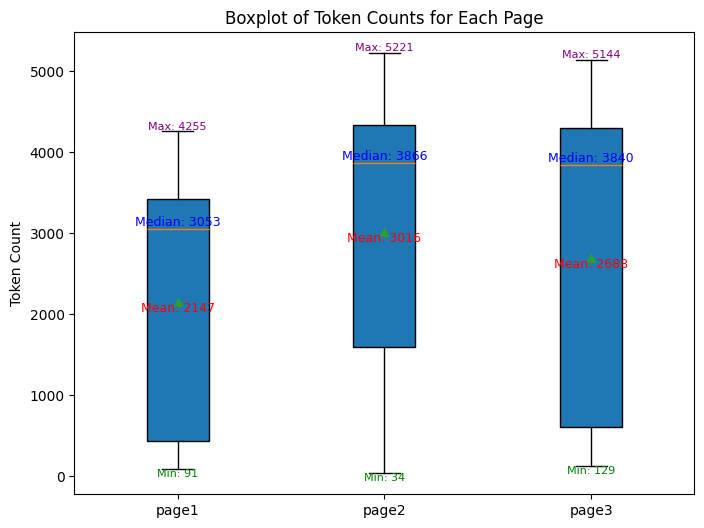

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
box = plt.boxplot(
    [data['page1_token_count'], data['page2_token_count'], data['page3_token_count']],
    labels=['page1', 'page2', 'page3'],
    patch_artist=True,
    showmeans=True
)

# Annotate median, mean, min, max for each box
for i, column in enumerate(['page1_token_count', 'page2_token_count', 'page3_token_count']):
    col_data = data[column].dropna()
    median = col_data.median()
    mean = col_data.mean()
    min_val = col_data.min()
    max_val = col_data.max()
    plt.text(i + 1, median, f'Median: {median:.0f}', ha='center', va='bottom', fontsize=9, color='blue')
    plt.text(i + 1, mean, f'Mean: {mean:.0f}', ha='center', va='top', fontsize=9, color='red')
    plt.text(i + 1, min_val, f'Min: {min_val:.0f}', ha='center', va='top', fontsize=8, color='green')
    plt.text(i + 1, max_val, f'Max: {max_val:.0f}', ha='center', va='bottom', fontsize=8, color='purple')

plt.ylabel('Token Count')
plt.title('Boxplot of Token Counts for Each Page')
plt.show()

### lets remove non arabic letters and unecessary spaces to reduce token counts 

In [9]:
before_cleaning = data.copy()

In [10]:
# Define a regex pattern to keep Arabic letters, numbers, and punctuations
arabic_pattern = r'[^\u0600-\u06FF\u0750-\u077F\u08A0-\u08FF0-9.,;:!?()\[\]{}\-–—\'"“”\s]'

for page in ['page1', 'page2', 'page3']:
    data[page] = data[page].apply(lambda x: re.sub(arabic_pattern, '', x))

In [11]:
for page in ['page1', 'page2', 'page3']:
    data[page] = data[page].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

### Recalculate

In [12]:
data[[f"{page}_token_count" for page in ["page1", "page2", "page3"]] ] = data[["page1", "page2", "page3"]].progress_apply(lambda x: [getTokenCount(x["page1"]), getTokenCount(x["page2"]), getTokenCount(x["page3"])], axis=1, result_type='expand')

100%|██████████| 1635/1635 [00:24<00:00, 67.17it/s]


/tmp/ipykernel_173141/1522599.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(


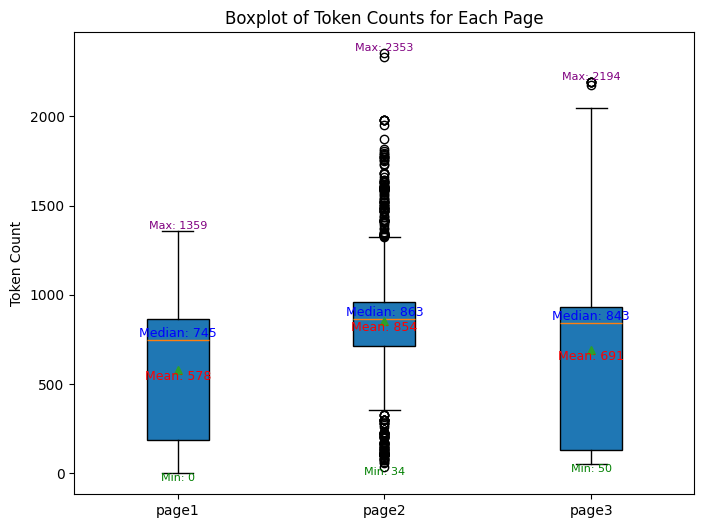

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
box = plt.boxplot(
    [data['page1_token_count'], data['page2_token_count'], data['page3_token_count']],
    labels=['page1', 'page2', 'page3'],
    patch_artist=True,
    showmeans=True
)

# Annotate median, mean, min, max for each box
for i, column in enumerate(['page1_token_count', 'page2_token_count', 'page3_token_count']):
    col_data = data[column].dropna()
    median = col_data.median()
    mean = col_data.mean()
    min_val = col_data.min()
    max_val = col_data.max()
    plt.text(i + 1, median, f'Median: {median:.0f}', ha='center', va='bottom', fontsize=9, color='blue')
    plt.text(i + 1, mean, f'Mean: {mean:.0f}', ha='center', va='top', fontsize=9, color='red')
    plt.text(i + 1, min_val, f'Min: {min_val:.0f}', ha='center', va='top', fontsize=8, color='green')
    plt.text(i + 1, max_val, f'Max: {max_val:.0f}', ha='center', va='bottom', fontsize=8, color='purple')

plt.ylabel('Token Count')
plt.title('Boxplot of Token Counts for Each Page')
plt.show()

### we reduced token counts and now the we can infere qwen proprely for good performance


In [14]:
data.to_csv("2-step2.csv", index=False)

In [22]:
print(data['page2'][30])  

اإلصدارالسابع العدد ستة وستون تاريخ اإلصدار: 2 نيسان 2024 م .. 261 () : 2663 -5798 : 2663 -5798 المستخلص: هدفت هذه الدراسة للكشف عن دور إنتاج الطاقة المتجددة بأبعاده (الطاقة الشمسية ، الطاقة الهوائية ، الطاقة النووية ، الطاقة الحرارية)في تحقيق التنمية المستدامة لشركة الكهرباء السعودية ، ولتحقيق أهداف الدراسة تم استخدام منهجي الوصفي والتحليلي، حيث تم بناء استبانة وتوزيعها على ا لعاملين في شركة الكهرباء السعودية ، وقد تم اختيار عينة عشوائية بسيطة مكونة من (110 ) ، حيث تم توزيع االستبانة ، ولغرض تحليل البيانات واختبار الفرضيات تم استخدام العديد من االختبارات اإلحصائية التي تتالئم مع الدراسة من خالل برمجية ( .) وقد توصلت الدراسة إلى العديد من النتائج أهمها : وجود عالقة ارتباط طردية قوية ذات داللة إحصائية بين إنتاج الطاقة الشمسية كأحد أبعاد إنتاج الطاقة المتجددة على التنمية المستدامة بشركة الكهرباء السعودية ،و وجود عالقة ارتباط طردية قوية ذات داللة إحصائية بين إنتاج الطاقة الهوائية كأحد أبعاد إنتاج الطاقة المتجددة على التنمية المستدامة بشركة الكهرباء السعودية ،و وجود عالقة ارتباط طردية قوية

### let's try now the inference for extraction

In [16]:
import pprint 

res = extract_article_metadata([data.loc[0, "page1"], data.loc[0, "page2"]],6000)

Error: Model output was not valid JSON.
Raw Output: {
  "title": "درجة اكتساب طلبة كلية التربية بجامعة السلطان قابوس لمهارات البحث الإجرائي وصعوبات تنفيذه من خالل إعدادهم لمشروع التخرج",
  "abstract_ar": "درجة اكتساب طلبة كلية التربية بجامعة السلطان قابوس لمهارات البحث الإجرائي، وصعوبات تنفيذه من خالل إعدادهم لمشروع التخرج، استخدـ عبمع البيانات أداتاف: الدراسة أداتاف: الدراسة أداتاف: الدراسة أداتاف: الدراسة أداتاف: الدراسة أداتاف: الدراسة أداتاف: الدراسة أداتاف: الدراسة أداتاف: الدراسة أداتاف: الدراسة أداتاف: الدراسة أداتاف: الدراسة أداتاف: الدراسة أداتاف: الدراسة أداتاف: الدراسة أداتاف: الدراسة أداتاف: الدراسة أداتاف: الدراسة أداتاف: الدراسة أداتاف: الدراسة أداتاف: الدراسة أداتاف: الدراسة أداتاف: الدراسة أداتاف: الدراسة أداتاف: الدراسة أداتاف: الدراسة أداتاف: الدراسة أداتاف: الدراسة أداتاف: الدراسة أداتاف: الدراسة أداتاف: الدراسة أداتاف: الدراسة أداتاف: الدراسة أداتاف: الدراسة أداتاف: الدراسة أداتاف: الدراسة أداتاف: الدراسة أداتاف: الدراسة أداتاف: الدراسة أداتاف: الدراسة أداتاف: الدرا

In [17]:
res